# Setup

In [1]:
import os

# scratch directory is apart of the .gitignore to ensure it is not committed to git
%env SCRATCH=../scratch
scratch_path = os.environ.get("SCRATCH", "scratch")

env: SCRATCH=../scratch


In [2]:
# install dependencies
%pip install -q -U pip
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from IPython.display import display, Image
from PIL import Image 
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.metrics import confusion_matrix

from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout

K.clear_session()

2023-06-29 04:18:48.705542: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-29 04:18:48.757180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 04:18:49.630883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load the data

In [4]:
# setup paths for data
dataset = scratch_path + "/Vegetable Images/"

train_folder = os.path.join(dataset, "train")
test_folder = os.path.join(dataset, "validation")
validation_folder = os.path.join(dataset, "test")

# Explore the data

In [5]:
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

In [6]:
count_files(os.path.join(train_folder))

There are 1000 files in Bean
There are 1000 files in Radish
There are 1000 files in Carrot
There are 1000 files in Bitter_Gourd
There are 1000 files in Papaya
There are 1000 files in Cabbage
There are 1000 files in Broccoli
There are 1000 files in Tomato
There are 1000 files in Cauliflower
There are 1000 files in Brinjal
There are 1000 files in Cucumber
There are 1000 files in Capsicum
There are 1000 files in Potato
There are 1000 files in Pumpkin
There are 1000 files in Bottle_Gourd


In [7]:
count_files(os.path.join(test_folder))

There are 200 files in Bean
There are 200 files in Radish
There are 200 files in Carrot
There are 200 files in Bitter_Gourd
There are 200 files in Papaya
There are 200 files in Cabbage
There are 200 files in Broccoli
There are 200 files in Tomato
There are 200 files in Cauliflower
There are 200 files in Brinjal
There are 200 files in Cucumber
There are 200 files in Capsicum
There are 200 files in Potato
There are 200 files in Pumpkin
There are 200 files in Bottle_Gourd


As evident, Dataset is well balanced with each class containing :
1000 images for training set.
200 images for test set.

# Image Proprocessing

The goal of image processing is improvement of pictorial information for human interpretation. Basic manipulation and filtering can lead to increased understanding for feature extraction as well.

We increase the color saturation, contrast and finally sharpened the image for drawing texture and viewer focus. The image after processing looks appealing and brighter

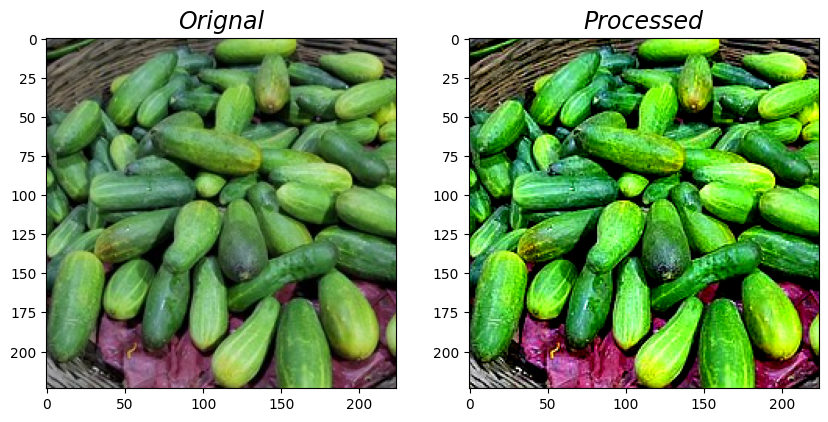

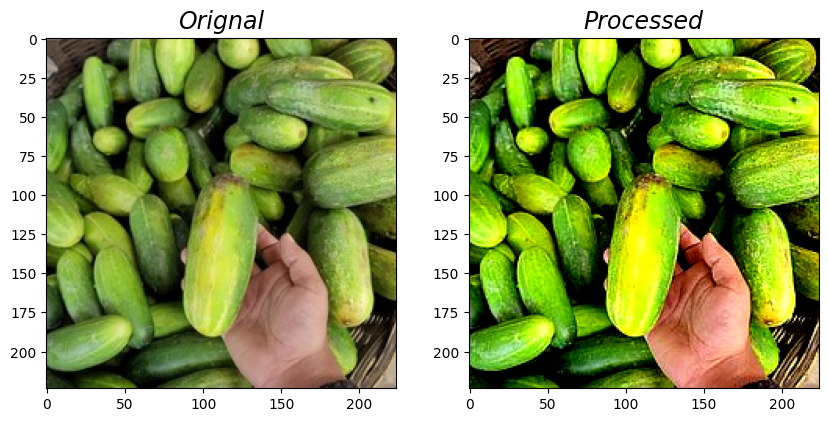

In [8]:
image_folder="Cucumber"  # The vegetable you want to display
number_of_images=2       # Number of images to display

def Preprocess():
    j=1
    for i in range(number_of_images):
    
        folder = os.path.join(test_folder,image_folder)
        a=random.choice(os.listdir(folder))

        image=Image.open(os.path.join(folder,a))
        image_duplicate=image.copy()
        plt.figure(figsize=(10,10))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Orignal', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        image1=ImageEnhance.Color(image_duplicate).enhance(1.35)
        image1=ImageEnhance.Contrast(image1).enhance(1.45)
        image1=ImageEnhance.Sharpness(image1).enhance(2.5)
        
        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1
        
Preprocess()

# Data Visualization

We can start exploring the dataset and visualize any class label (for instance, Capsicum). You can choose any vegetable to visualize the images of that class. Changing rows and columns variable also results in different format positioning of matplotlib.

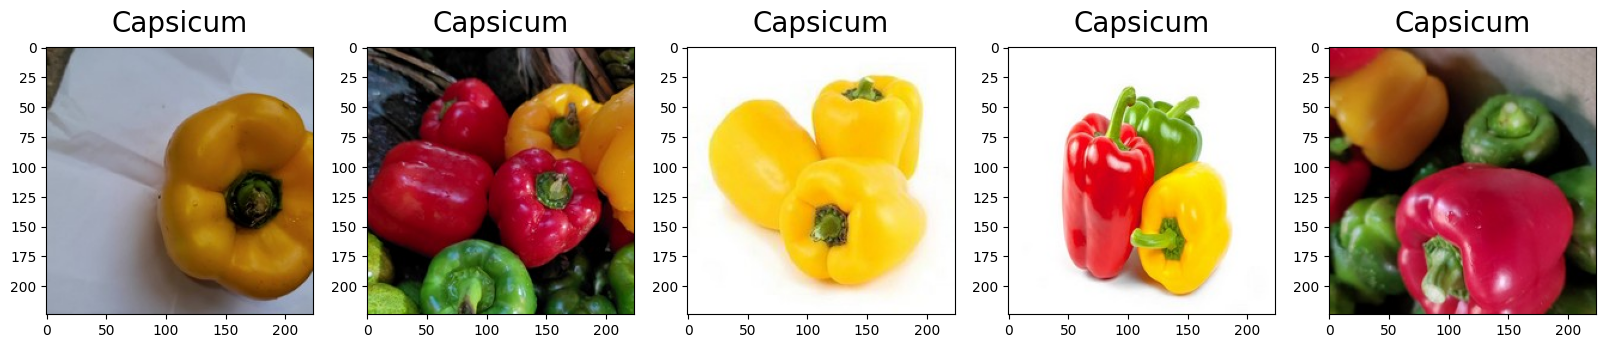

In [9]:
select_vegetable="Capsicum"
rows,columns = 1,5

display_folder=os.path.join(train_folder,select_vegetable)
total_images=rows*columns
fig=plt.figure(1, figsize=(20, 10))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(train_folder,select_vegetable,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_vegetable, pad = 11, size=20)
    plt.imshow(img)
    
    if i==total_images-1:
        break

Now let's visualize the whole dataset by picking a random image from each class inside training dataset.

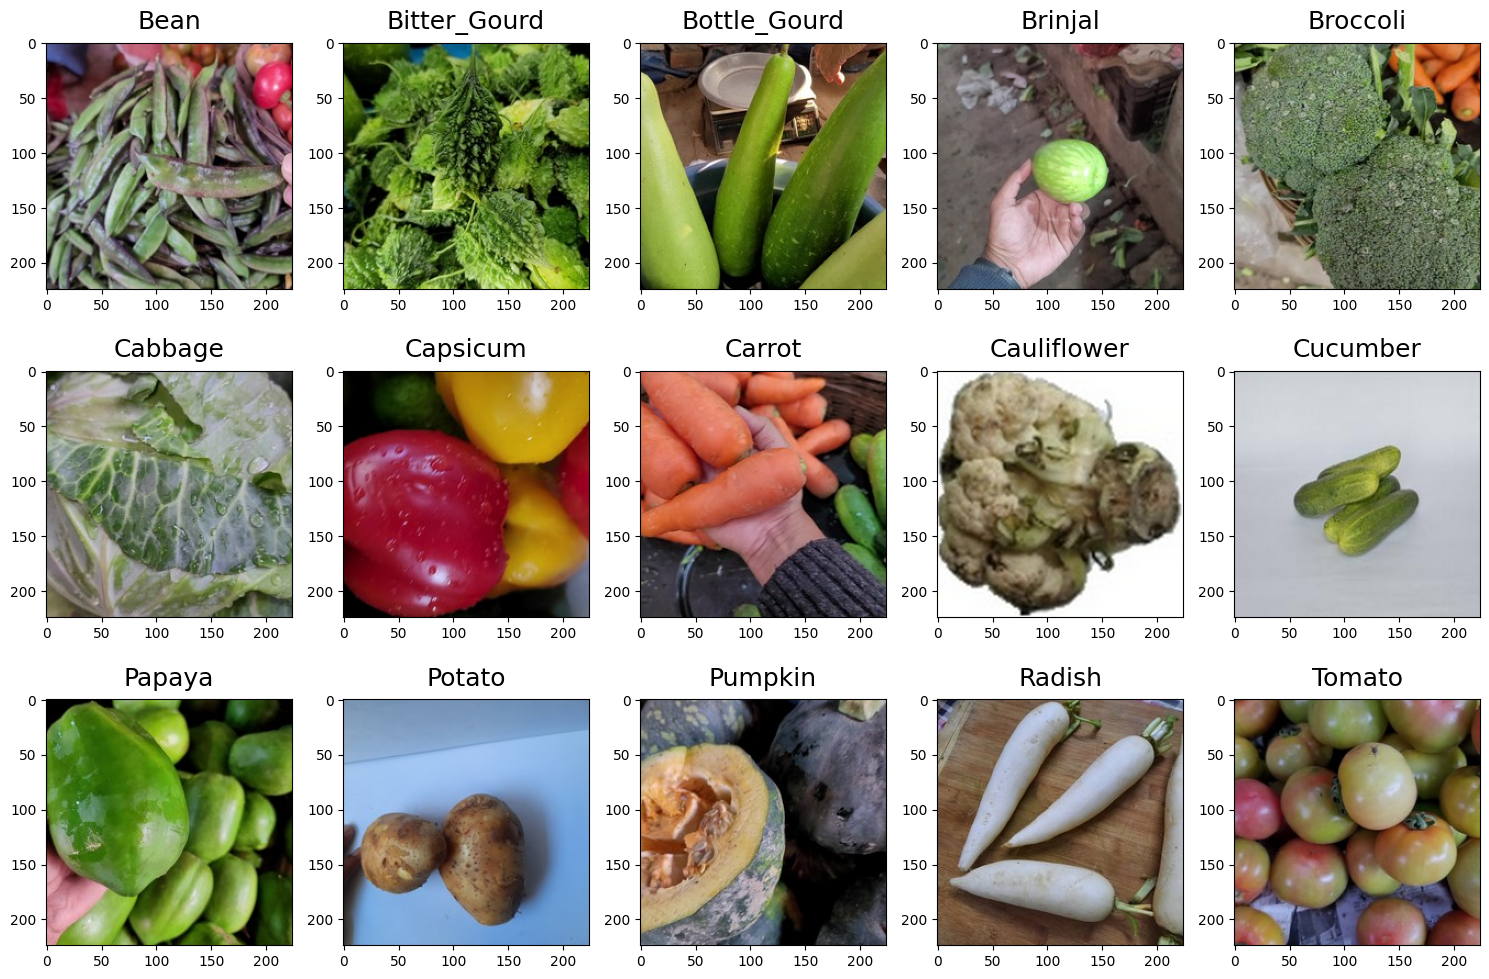

In [10]:
images = []

for food_folder in sorted(os.listdir(train_folder)):
    food_items = os.listdir(train_folder + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))
                                     
fig=plt.figure(1, figsize=(15, 10))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(3, 5, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

There are 15 vegetables (output classes) and one random image from each class helps in determining basic outlook of dataset and what picture quality along with different metric are visible. So far, So Good!